In [1]:
%load_ext autoreload
%autoreload 2

from mortgage.computation import compute_mortgage
from mortgage.scenario import plot_interest_scenarios

# Goal of this notebook

In this notebook you can compute and compare monthly fees and the total burden of different mortgages.
Also you can compare different scenario's with future interest rates.

## Define your mortgage

To compute a mortgage you should give valid parameters.

E.g. the sum of the periods should amount to the total duration. If not you get an error as follows:

In [2]:
compute_mortgage(periods=[240], interest_rates=[2.5, 3], mortgage_amount=300_000, mortgage_duration=360)

ERROR: mortgage not possible


Impossible mortgage: 0 euro
Total burden: 0 euro
Monthly fees:

An example of a correct mortgage.

In [3]:
mortgage_example = compute_mortgage(
    periods=[120, 240], 
    interest_rates=[2, 3], 
    mortgage_amount=300_000, 
    mortgage_duration=360,
    name='Example mortgage') 

mortgage_example

Example mortgage: 300,000 euro
Total burden: 424,815 euro
Monthly fees:
- 120 months: 1108 euro's
- 240 months: 1215 euro's

## Visualize your mortgage

You can plot your mortgage to visualize the monthly fees over the periods.

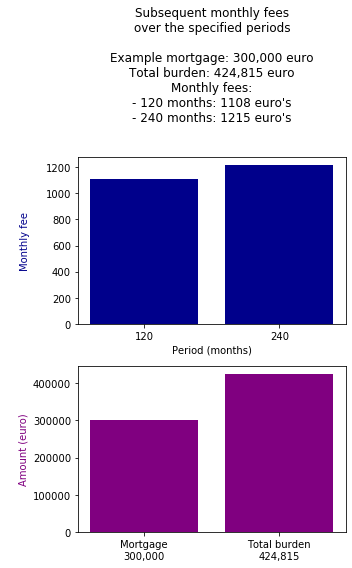

In [4]:
mortgage_example.plot();

For one mortgage this is not very useful, but it is nice to compare mortgages.

In [5]:
mortgage_example2 = compute_mortgage(
    periods=[240, 120], 
    interest_rates=[2, 3], 
    mortgage_amount=300_000, 
    mortgage_duration=360,
    name='20 + 10 years') 

mortgage_example3 = compute_mortgage(
    periods=[360], 
    interest_rates=[3.1], 
    mortgage_amount=300_000, 
    mortgage_duration=360,
    name='30 years') 

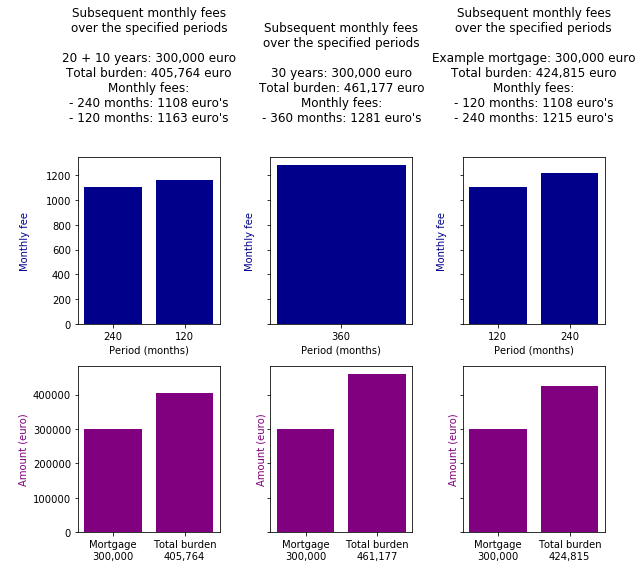

In [6]:
mortgage_example.compare([mortgage_example2, mortgage_example3]);

## Future interest scenario's

To compare scenario's with diferent future interest rates we can define a mortgage and a minimum and maximum interest rate for the last fixed period in the mortgage.

The plot will show the increase in monthly fee and burden when increasing the future interest rate from the minimum to the maximum (comparing to the specified minimum interest rate).

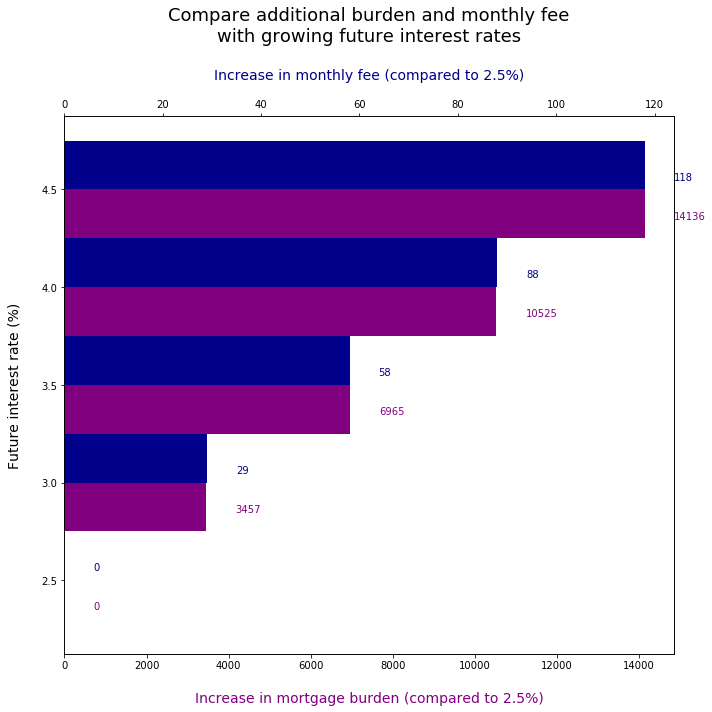

In [7]:
plot_interest_scenarios(
    periods=[240, 120],
    interest_rates=[2.5],
    future_interest_rate_min=2.5,
    future_interest_rate_max=5,
    mortgage_amount=300_000,
    mortgage_duration=360,
);

## Aditional features

You can also add mortgages which can be interesting when you want to split your mortgage in multiple part. E.g. one part 30 years fixed, one part 20 + 10 years and one part 10 + 10 + 10 years.

In [8]:
part1 = compute_mortgage(
    periods=[360], 
    interest_rates=[3], 
    mortgage_amount=100_000, 
    mortgage_duration=360,
    name='Part 1')

part2 = compute_mortgage(
    periods=[240, 120], 
    interest_rates=[3, 4], 
    mortgage_amount=100_000, 
    mortgage_duration=360,
    name='Part 2')

part3 = compute_mortgage(
    periods=[120, 120, 120], 
    interest_rates=[2, 3, 4], 
    mortgage_amount=100_000, 
    mortgage_duration=360,
    name='Part 3')

part1 + part2 + part3

Part 1 & Part 2 & Part 3: 300,000 euro
Total burden: 449,972 euro
Monthly fees:
- 120 months: 1211 euro's
- 120 months: 1247 euro's
- 120 months: 1287 euro's

Compare this to the whole mortgage for 30 years fixed.

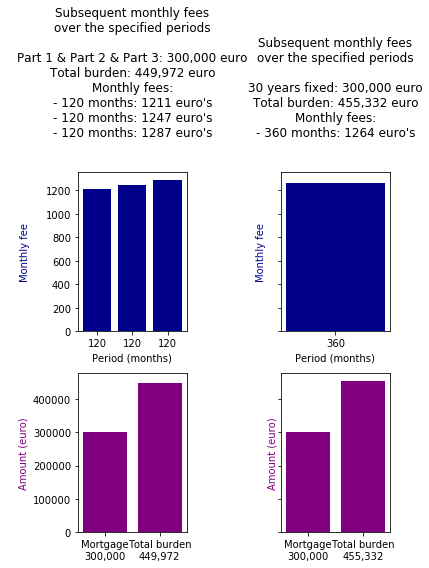

In [9]:
fixed30 = compute_mortgage(
    periods=[360], 
    interest_rates=[3], 
    mortgage_amount=300_000, 
    mortgage_duration=360,
    name='30 years fixed')

fixed30.compare([part1 + part2 + part3]);